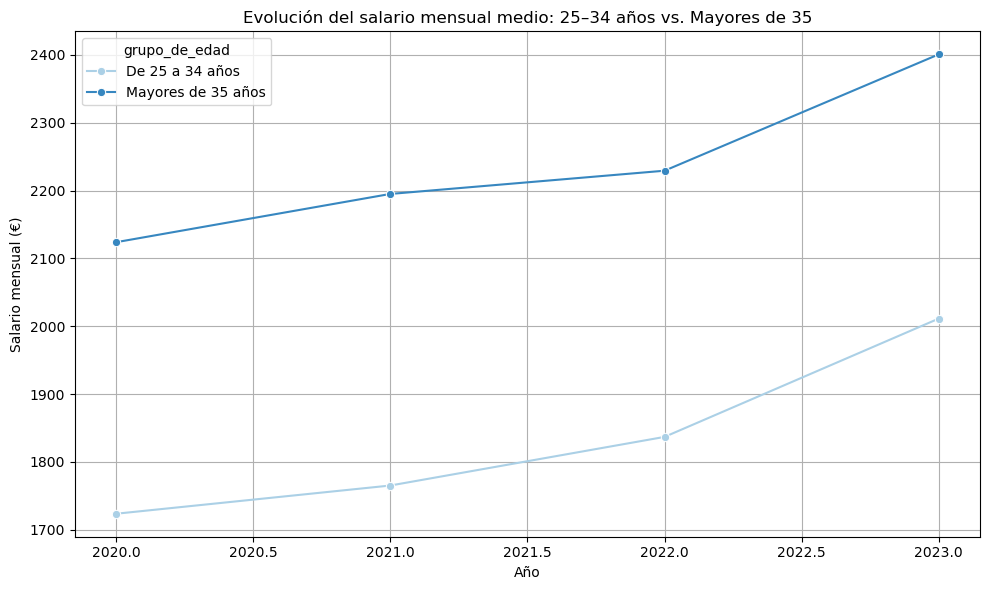

Crecimiento salarial año a año (%)
grupo_de_edad  De 25 a 34 años  Mayores de 35 años
año                                               
2021                      2.41                3.35
2022                      4.06                1.56
2023                      9.50                7.70


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV
df = pd.read_csv("../data/clean/salario_edad_sql.csv")

# Filtrar datos relevantes
df_filtered = df[
    (df["año"].between(2020, 2023)) &
    (df["decil"] == "Total decil") &
    (df["tipo_de_jornada"] == "Total")
]

# Separar por grupo de edad
df_grupo_edad = df_filtered[df_filtered["grupo_de_edad"] != "Total"]

# Grupo de 25 a 34 años
grupo_25_34 = df_grupo_edad[df_grupo_edad["grupo_de_edad"] == "De 25 a 34 años"]

# Grupo mayores de 35 años
mayores_35 = df_grupo_edad[df_grupo_edad["grupo_de_edad"].isin([
    "De 35 a 44 años", "De 45 a 54 años", "De 55 a 64 años", "65 y más años"
])]

# Calcular media salarial para mayores de 35 por año
mayores_35_grouped = mayores_35.groupby("año")["total"].mean().reset_index()
mayores_35_grouped["grupo_de_edad"] = "Mayores de 35 años"

# Unir ambos grupos
grupo_comparativo = pd.concat([
    grupo_25_34[["año", "total", "grupo_de_edad"]],
    mayores_35_grouped
])

# Gráfico comparativo
plt.figure(figsize=(10, 6))
sns.lineplot(data=grupo_comparativo, x="año", y="total", hue="grupo_de_edad", palette="Blues", marker="o")
plt.title("Evolución del salario mensual medio: 25–34 años vs. Mayores de 35")
plt.ylabel("Salario mensual (€)")
plt.xlabel("Año")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular % de crecimiento interanual
pivot = grupo_comparativo.pivot(index="año", columns="grupo_de_edad", values="total")
growth_pct = pivot.pct_change().dropna() * 100
print("Crecimiento salarial año a año (%)")
print(growth_pct.round(2))
